In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Loading the data

In [ ]:
df=pd.read_csv('processed.cleveland.csv')

In [ ]:
df.head()

,63.0,1.0,1.0.1,145.0,233.0,1.0.2,2.0,150.0,0.0,2.3,3.0,0.0.1,6.0,0
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0


Naming the columns

In [ ]:
df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope','ca','thal','num']
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0


# Exploratory analysis

In [ ]:
df.shape

(302, 14)

In [ ]:
df.groupby('num').describe()

age                                    ... slope                    
     count       mean       std   min    25%  ...   min  25%  50%  75%  max
num                                           ...                          
0    163.0  52.521472  9.505903  29.0  44.50  ...   1.0  1.0  1.0  2.0  3.0
1     55.0  55.381818  8.001136  35.0  50.50  ...   1.0  1.0  2.0  2.0  3.0
2     36.0  58.027778  7.220946  42.0  55.75  ...   1.0  2.0  2.0  2.0  3.0
3     35.0  56.000000  7.780065  39.0  51.50  ...   1.0  2.0  2.0  2.0  3.0
4     13.0  59.692308  9.419701  38.0  57.00  ...   1.0  2.0  2.0  2.0  3.0

[5 rows x 88 columns]

In the last column 0 means absence of heart disease and 1-4  means presence of heart disease

In [ ]:
df['num'] = df.num.map({0: 0, 1: 1, 2: 1, 3: 1, 4: 1})

In [ ]:
df.head(303)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
298,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,1
299,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,1
300,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


#  Visualizing the data

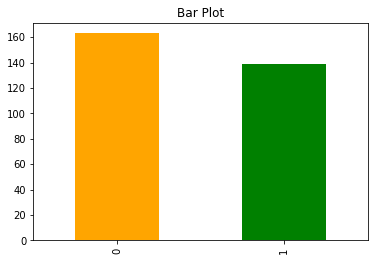

In [ ]:
count=pd.value_counts(df['num'], sort= True)
count.plot(kind = 'bar',color = ["orange","green"])
plt.title('Bar Plot')
plt.show();

# Data pre-processing and splitting

In [ ]:
import regex
df=df.replace(r'\?',float('NaN'),regex=True)

In [ ]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

Replacing values that have NaN with median of their repective colums

In [ ]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy="median")
imputer.fit(X[:,11:13])

SimpleImputer(strategy='median')

In [ ]:
X[:,11:13]=imputer.transform(X[:,11:13])
X

array([[67.0, 1.0, 4.0, ..., 2.0, 3.0, 3.0],
       [67.0, 1.0, 4.0, ..., 2.0, 2.0, 7.0],
       [37.0, 1.0, 3.0, ..., 3.0, 0.0, 3.0],
       ...,
       [57.0, 1.0, 4.0, ..., 2.0, 1.0, 7.0],
       [57.0, 0.0, 2.0, ..., 2.0, 1.0, 3.0],
       [38.0, 1.0, 3.0, ..., 1.0, 0.0, 3.0]], dtype=object)

# Splitting of data
Train : Test ratio is 80:20

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)

# Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n",cm)

Confusion Matrix:
 [[28  5]
 [ 6 22]]


# Accuaracy score

In [ ]:
print("\nAccuracy Score:")
accuracy_score(y_test, y_pred)


Accuracy Score:


0.819672131147541

# Graph out of Confusion matrix

Text(33.0, 0.5, 'Actual')

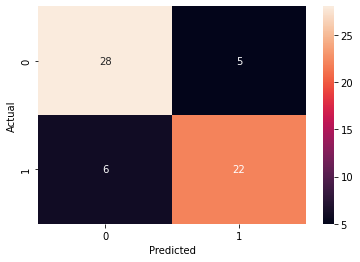

In [ ]:
import seaborn as sns
sns.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Actual')